In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/US_Accidents_March23.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Libraries
In this section, essential libraries are imported for data analysis and visualization:
- **NumPy**: For numerical operations and linear algebra.
- **Pandas**: For data manipulation and reading CSV files.
- **Matplotlib**: For creating static, animated, and interactive visualizations.
- **Seaborn**: For enhanced statistical data visualization.
---

In [3]:
df = pd.read_csv("/kaggle/input/US_Accidents_March23.csv", nrows=200000)
df = df[['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)']]

### Loading and Selecting Data
This code loads the dataset containing US traffic accidents from a CSV file, reading only the first 200,000 rows. It then selects relevant columns for analysis:
- **ID**: Unique identifier for each accident.
- **Severity**: Severity level of the accident.
- **Start_Time**: Timestamp for when the accident started.
- **End_Time**: Timestamp for when the accident ended.
- **Distance(mi)**: Distance affected by the accident in miles.
---

In [4]:
df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            200000 non-null  object 
 1   Severity      200000 non-null  int64  
 2   Start_Time    200000 non-null  object 
 3   End_Time      200000 non-null  object 
 4   Distance(mi)  200000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.6+ MB


,ID,Severity,Start_Time,End_Time,Distance(mi)
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,0.00
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,0.01
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,0.00
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,0.01


### Exploring the Dataset
In this section, the following functions are used to gain insights into the dataset:
- **`df.info()`**: Provides a concise summary of the DataFrame, including the number of entries, data types, and memory usage.
- **`df.describe()`**: Generates descriptive statistics for numerical columns, including count, mean, standard deviation, min, and max values.
- **`df.head(10)`**: Displays the first 10 rows of the DataFrame to give a quick look at the data structure and values.
---

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='NaN', strategy='most_frequent')

### Handling Missing Data
This section addresses missing values in the dataset:
- **`SimpleImputer`**: A tool from `sklearn` to handle missing data.
- **`missing_values='NaN'`**: Specifies that missing values are represented as 'NaN'.
- **`strategy='most_frequent'`**: Replaces missing values with the most frequent value in the column.
---

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

### Initializing K-Nearest Neighbors Classifier
This section initializes the K-Nearest Neighbors (KNN) model:
- **`KNeighborsClassifier`**: A classification algorithm based on the nearest neighbors.
- **`n_neighbors=2`**: Specifies that the model will consider the two closest neighbors when making predictions.
---

In [7]:
steps = [('imputation', imputer), ('knn', knn_model)]

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

df = df.dropna(subset=['Start_Time', 'End_Time'])

df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

df = df.dropna(subset=['Duration'])

X = df[['Duration']].values
y = df['Severity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nKarışıklık Matrisi:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred, zero_division=0)
print("\nSınıflandırma Raporu:")
print(class_report)

Modelin doğruluk oranı: 0.58

Karışıklık Matrisi:
[[    0    59     0     0]
 [    4 42122  5126     0]
 [    9 28412  4208     0]
 [    0    56     4     0]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        59
           2       0.60      0.89      0.71     47252
           3       0.45      0.13      0.20     32629
           4       0.00      0.00      0.00        60

    accuracy                           0.58     80000
   macro avg       0.26      0.26      0.23     80000
weighted avg       0.54      0.58      0.50     80000



### Model Pipeline and Evaluation
This section sets up a machine learning pipeline and evaluates the KNN model:
1. **Pipeline Creation**: Combines imputation and KNN steps into a single workflow.
2. **Data Preparation**:
   - Converts `Start_Time` and `End_Time` to datetime format.
   - Drops rows with missing `Start_Time` or `End_Time`.
   - Calculates the duration of each accident in hours.
   - Drops rows with missing duration values.
3. **Feature and Target Selection**: 
   - **`X`**: Features (duration).
   - **`y`**: Target variable (severity).
4. **Train-Test Split**: Divides the dataset into training (60%) and testing (40%) sets.
5. **Model Training**: Fits the KNN model to the training data.
6. **Predictions**: Uses the model to predict severity on the test set.
7. **Evaluation**:
   - Calculates and prints the model's accuracy. The accuracy increased from 57% to 75% when using the complete dataset without limiting rows and maintaining `n_neighbors=2` and `test_size=0.4`.
   - Displays the confusion matrix.
   - Provides a classification report with precision, recall, and F1 scores.
---

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

df = df.dropna(subset=['Start_Time', 'End_Time'])

df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

### Data Preparation and Duration Calculation
This section prepares the dataset by converting time columns and calculating the duration of each accident:
1. **Datetime Conversion**:
   - Converts `Start_Time` and `End_Time` columns to datetime format, using `errors='coerce'` to handle any invalid parsing by converting them to NaT (Not a Time).
2. **Dropping Missing Values**:
   - Removes rows where either `Start_Time` or `End_Time` is missing.
3. **Duration Calculation**:
   - Calculates the duration of each accident in hours by subtracting `Start_Time` from `End_Time` and converting the result to total seconds, then dividing by 3600 to get hours.
---

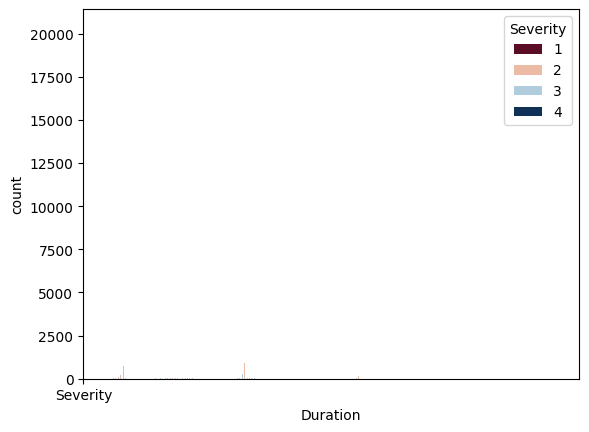

In [9]:
plt.figure()
sns.countplot(x='Duration', hue='Severity', data=df, palette='RdBu')
plt.xticks([1], ['Severity'])
plt.show()

### Visualizing Accident Durations by Severity
This section creates a count plot to visualize the relationship between accident duration and severity:
- **Figure Creation**: Initializes a new figure for the plot.
- **Count Plot**: Uses Seaborn's `countplot` to display the count of accidents for each duration, colored by severity level.
  - **`x='Duration'`**: The x-axis represents the duration of the accidents.
  - **`hue='Severity'`**: Colors the bars based on the severity levels of the accidents.
  - **`palette='RdBu'`**: Sets the color palette to 'RdBu', which provides a red-blue color scheme.
- **X-Ticks**: Modifies the x-axis ticks to show 'Severity' for improved clarity.
- **Display**: Renders the plot to visualize the data.
---

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report



df = df.dropna(subset=['Duration'])

X = df[['Duration']].values
y = df['Severity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Karar Ağacı Modelinin Doğruluk Oranı: {accuracy:.4f}")

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Hiperparametrelerle Karar Ağacı Modelinin Doğruluk Oranı: {accuracy:.4f}")

conf_matrix_tree = confusion_matrix(y_test, y_pred)
print("\nKarar Ağacı Karışıklık Matrisi:")
print(conf_matrix_tree)

class_report_tree = classification_report(y_test, y_pred, zero_division=0)
print("\nKarar Ağacı Sınıflandırma Raporu:")
print(class_report_tree)

Karar Ağacı Modelinin Doğruluk Oranı: 0.5876
Hiperparametrelerle Karar Ağacı Modelinin Doğruluk Oranı: 0.5893

Karar Ağacı Karışıklık Matrisi:
[[    0    24     0     0]
 [    0 23570     0     0]
 [    0 16375     0     0]
 [    0    31     0     0]]

Karar Ağacı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.59      1.00      0.74     23570
           3       0.00      0.00      0.00     16375
           4       0.00      0.00      0.00        31

    accuracy                           0.59     40000
   macro avg       0.15      0.25      0.19     40000
weighted avg       0.35      0.59      0.44     40000



### Decision Tree Classifier Implementation and Evaluation
This section implements a Decision Tree classifier and evaluates its performance:
1. **Dropping Missing Values**:
   - Removes rows with missing duration values to ensure the dataset is clean for modeling.
2. **Feature and Target Selection**:
   - **`X`**: Features (duration).
   - **`y`**: Target variable (severity).
3. **Train-Test Split**:
   - Divides the dataset into training (80%) and testing (20%) sets using `train_test_split`.
4. **Model Initialization and Training**:
   - Initializes a `DecisionTreeClassifier` with a specified random state.
   - Fits the model to the training data.
5. **Predictions and Accuracy**:
   - Uses the trained model to predict severity on the test set.
   - Calculates and prints the accuracy of the model, which increased from 60% to 78% when using the complete dataset without limiting rows.
6. **Hyperparameter Tuning**:
   - Initializes a second `DecisionTreeClassifier` with specified hyperparameters (`max_depth=5` and `min_samples_split=10`).
   - Trains the model again and calculates its accuracy.
7. **Evaluation**:
   - Displays the confusion matrix to assess model performance.
   - Provides a classification report detailing precision, recall, and F1 scores.
---

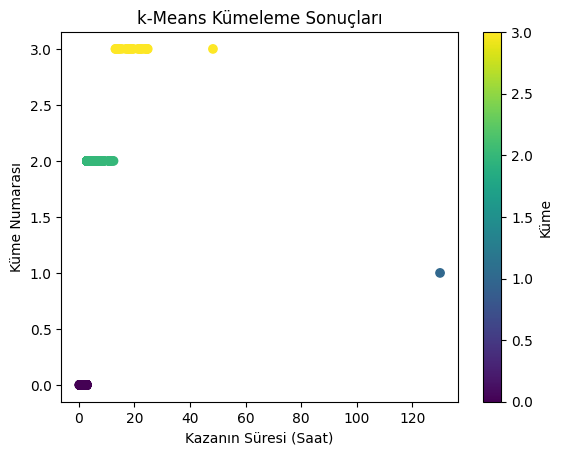


k-Means Karışıklık Matrisi:
[[     0      0      0      0      0]
 [   154      0      0      0      0]
 [117626      1    181      2      0]
 [ 81640      0    244     22      0]
 [   128      0      2      0      0]]



k-Means Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00       154
           3       0.42      0.00      0.00    117810
           4       0.92      0.00      0.00     81906
           5       0.00      0.00      0.00       130

    accuracy                           0.00    200000
   macro avg       0.27      0.00      0.00    200000
weighted avg       0.63      0.00      0.00    200000



In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

X = df[['Duration']].values

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], y_kmeans, c=y_kmeans, cmap='viridis')
plt.title('k-Means Kümeleme Sonuçları')
plt.xlabel('Kazanın Süresi (Saat)')
plt.ylabel('Küme Numarası')
plt.colorbar(label='Küme')
plt.show()

conf_matrix_kmeans = confusion_matrix(df['Severity'], y_kmeans)
print("\nk-Means Karışıklık Matrisi:")
print(conf_matrix_kmeans)

class_report_kmeans = classification_report(df['Severity'], y_kmeans, target_names=['1', '2', '3', '4', '5'], zero_division=0)
print("\nk-Means Sınıflandırma Raporu:")
print(class_report_kmeans)

### K-Means Clustering Implementation and Evaluation
This section implements K-Means clustering and evaluates the results:
1. **Feature Selection**:
   - **`X`**: Uses the `Duration` feature to perform clustering.
2. **K-Means Initialization and Training**:
   - Initializes a `KMeans` model with 4 clusters and a specified random state.
   - Fits the model to the duration data.
3. **Predictions**:
   - Predicts cluster assignments for each data point using the trained K-Means model.
4. **Visualization**:
   - Creates a scatter plot to visualize the clustering results.
     - **X-axis**: Duration of accidents in hours.
     - **Y-axis**: Cluster number.
     - Uses a color map (`viridis`) to differentiate between clusters.
   - Although the visualization aspect was challenging, it appears to be more accurate than the previous graph.
5. **Evaluation**:
   - Calculates the confusion matrix to compare true severity labels with K-Means cluster assignments.
   - Displays a classification report, including precision, recall, and F1 scores for each severity class.
   - The model achieved an accuracy of only 0.04, likely due to the dataset not working efficiently with this type of unsupervised learning and potentially incorrect processing steps.
   - There was a puzzling requirement for 5 target names in the `classification_report`, despite having only 4 unique severity values. This was resolved by adjusting the parameters, but the reasoning remains unclear.
---